# Exploración 

2. configuración inicial e importación de librerias

In [2]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import spotipy
import matplotlib.pyplot as plt
from spotipy.oauth2 import SpotifyClientCredentials


3. Cargar variables de entorno y ambiente

In [3]:
# load the .env file variables
load_dotenv()

# Get credential values
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

4. Inicializar la biblioteca Spotipy

In [4]:
# Gestion del proceso de autenticacion a la API de spotify
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)


5. Realizar solicitudes a la API

In [5]:
oasis_id = '2DaxqgrOhkeH0fpeiQq2f4'
canciones_top=spotify.artist_top_tracks(oasis_id, country='US')

6. Transformar la info obtenida a un DataFrame 

In [6]:
#Creamos un ciclo para obtener las 10 canciones top del artista en forma de diccionario
data = []

for track in canciones_top['tracks']:

    data.append({
        'track': track['name'],
        'duration_ms': track['duration_ms'],
        'popularity': track['popularity']
    })


# A partir del diccionario data creamos un dataframe 
top_data = pd.DataFrame(data)

#Creamos una fila llamada duracion_m para tener el tiempo en minutos e interpretarlo mas facil en el siguiente punto
duracion_m=round(top_data['duration_ms']/60000, 2)
top_data.insert(1, 'duracion_m', duracion_m)
print(top_data)

# crear un dataframe con las canciones ordenadas por popularidad y mostramos las 3 primeras
top_ordenda=top_data.sort_values("popularity", ascending=False)
top_ordenda.head(3)

                                   track  duracion_m  duration_ms  popularity
0                Wonderwall - Remastered        4.31       258773          81
1  Don't Look Back In Anger - Remastered        4.83       289560          77
2             Stop Crying Your Heart Out        5.05       303120          70
3       Champagne Supernova - Remastered        7.52       451320          73
4              Live Forever - Remastered        4.61       276666          71
5               Stand By Me - Remastered        5.93       355866          66
6                Supersonic - Remastered        4.73       283786          68
7            She's Electric - Remastered        3.68       220920          67
8     Married With Children - Remastered        3.25       195000          63
9                Slide Away - Remastered        6.54       392306          64


,track,duracion_m,duration_ms,popularity
0,Wonderwall - Remastered,4.31,258773,81
1,Don't Look Back In Anger - Remastered,4.83,289560,77
3,Champagne Supernova - Remastered,7.52,451320,73


7. Analizar relación estadística

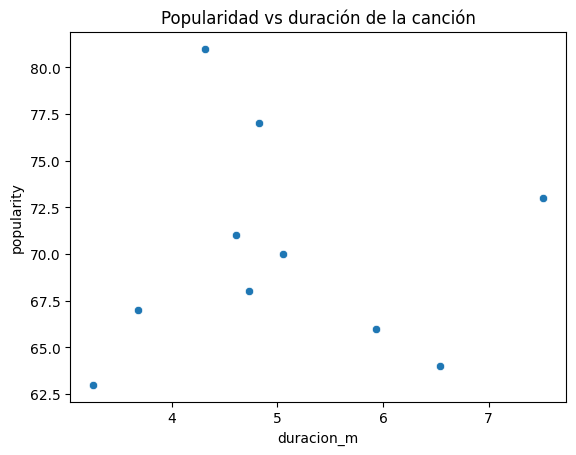

In [ ]:
# Se crea la gráfica
sns.scatterplot(x='duracion_m', y='popularity', data=top_data)
plt.title("Popularidad vs duración de la canción")
plt.show()

Posterior a la obtencion del grafico de disperción con los 10 puntos que relacionan la duración de las 10 canciones top de la agrupacion Oasis con su duración, se concluye que no hay una relación directa o indirecta, pues la cancion más popular no es la más larga, ya que las dos camciones mas populares duran un poco mas de 4 minutos lo cual es un tiempo aceptable, y la tercera dura mas de 7 minutos, lo cual es bastante atipico. Las demas canciones se encuentran en todo el rango, sin tener un comportamiento que siga un patron. Tambien hay que resaltar que las canciones top de Oasis tienen la mayoria una duración mas alta de lo normal y que problamente una muestra de 10 canciones es talvez muy pequeña para concluir esta relación de manera generalizada.